<h3>Data</h3>

https://www.kaggle.com/c/GiveMeSomeCredit

<h3>Dependencies</h3>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

<h3>Observing the data</h3>

In [49]:
df = pd.read_csv("Data/cs-training.csv")
df.rename(columns = {df.columns[0]:'ID'}, inplace = True) 
df.head(10)

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,6,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
6,7,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
7,8,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
8,9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
9,10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


In [50]:
df.describe()

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [51]:
#We are dropping some variables that won't be available for new customers, 
#as the purpose is to prepare dataset for building of a scoring model
df.drop(df.columns[[4, 8, 10]], axis=1, inplace=True)

In [52]:
P = df.groupby('SeriousDlqin2yrs')['ID'].count().reset_index()
P['Percentage'] = 100 * P['ID']  / P['ID'].sum()
print(P)

   SeriousDlqin2yrs      ID  Percentage
0                 0  139974      93.316
1                 1   10026       6.684


<h3>RevolvingUtilizationOfUnsecuredLines</h3>

This variable's statistic looks like it has problems with outliers

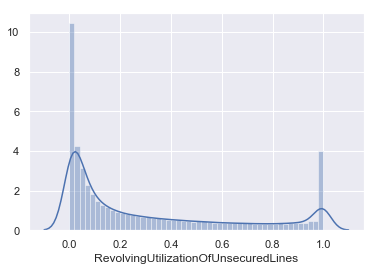

In [53]:
#Indeed:
df3=df.loc[df['RevolvingUtilizationOfUnsecuredLines'] <=1]
sns.distplot(df3['RevolvingUtilizationOfUnsecuredLines']);

In [54]:
#However, there are plenty of observations for which RUUL is greater than 1:
len(df[(df['RevolvingUtilizationOfUnsecuredLines']>1)])

3321

In [55]:
#So we better make them Nan ...
df['RevolvingUtilizationOfUnsecuredLines'] = df['RevolvingUtilizationOfUnsecuredLines'] \
                                                .map(lambda x: np.NaN if x >1 else x)
#and impute them using method preserving the distribution and mean of the variable
df['RevolvingUtilizationOfUnsecuredLines'].fillna(method='ffill', inplace=True)

<h3>Age</h3>

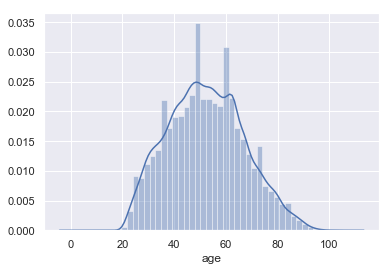

In [56]:
sns.distplot(df['age']);

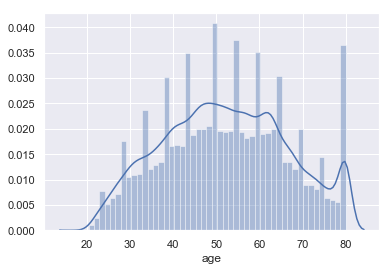

In [57]:
#As we see, there are very few observations out of range 18-80, we will cap them:
df.loc[df['age']>80, 'age']=80
df.loc[df['age']<18, 'age']=18
sns.distplot(df['age']);

<h3>DebtRatio</h3>

Is similar to RUUL: several outliers that we will impute using forward filling

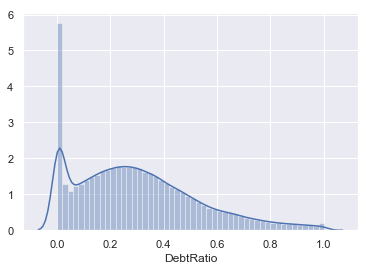

In [58]:
df2=df[df['DebtRatio']<=1]
sns.distplot(df2['DebtRatio']);

In [59]:
df.loc[df['DebtRatio']>1, 'DebtRatio']=np.NaN
df['DebtRatio'].fillna(method='ffill', inplace=True)

<h3>NumberOfOpenCreditLinesAndLoans</h3>

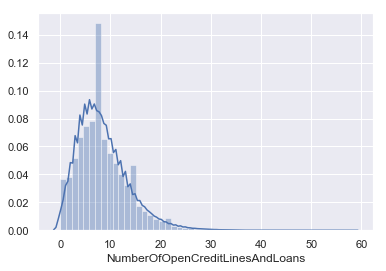

In [60]:
sns.distplot(df['NumberOfOpenCreditLinesAndLoans']);

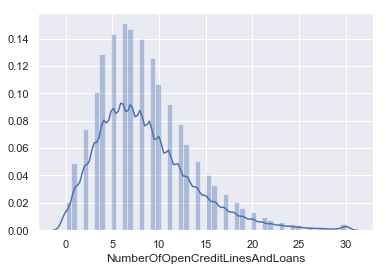

In [61]:
df.loc[df['NumberOfOpenCreditLinesAndLoans']>30, 'NumberOfOpenCreditLinesAndLoans']=30
sns.distplot(df['NumberOfOpenCreditLinesAndLoans']);

<h3>Monthly income</h3>

In [62]:
df['MonthlyIncome'].describe()

count    1.202690e+05
mean     6.670221e+03
std      1.438467e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.400000e+03
75%      8.249000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

There are few missing values, max value is too large, and minimum of 1000 is not suitable for finance industry

In [63]:
df['MonthlyIncome'].isnull().sum()

29731

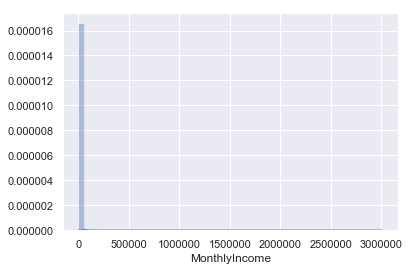

In [64]:
sns.distplot(df['MonthlyIncome'].dropna());

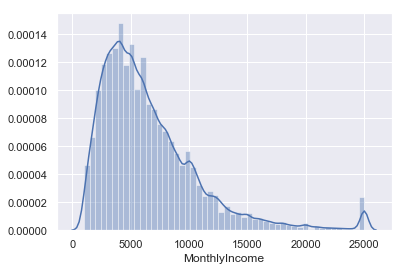

In [65]:
df.loc[df['MonthlyIncome']>25000, 'MonthlyIncome']=25000
df.loc[df['MonthlyIncome']<1000, 'MonthlyIncome']=np.NaN
df['MonthlyIncome'].fillna(method='ffill', inplace=True)
sns.distplot(df['MonthlyIncome']);

<h3>NumberRealEstateLoansOrLines</h3>

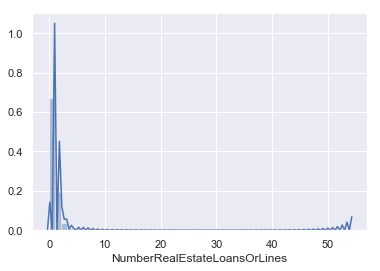

In [66]:
sns.distplot(df['NumberRealEstateLoansOrLines']);

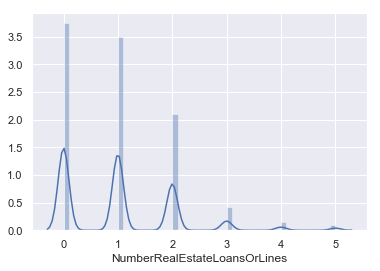

In [67]:
df.loc[df['NumberRealEstateLoansOrLines']>5, 'NumberRealEstateLoansOrLines']=5
sns.distplot(df['NumberRealEstateLoansOrLines']);

<h3>NumOfDependents</h3>

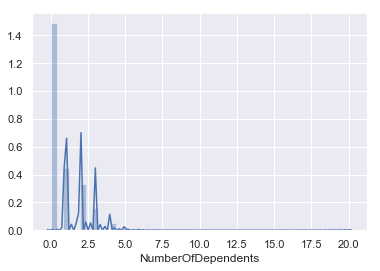

In [68]:
sns.distplot(df['NumberOfDependents'].dropna());

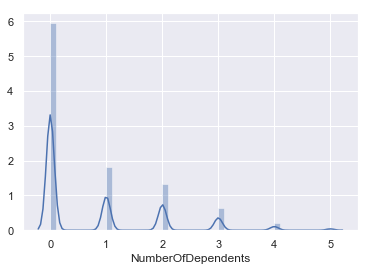

In [69]:
df.loc[df['NumberOfDependents']>5, 'NumberOfDependents']=5
df['NumberOfDependents'].fillna(method='ffill', inplace=True)
sns.distplot(df['NumberOfDependents']);